In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
from global_land_mask import globe
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
from matplotlib import gridspec

In [ ]:
# Figure 4: explained variance

In [2]:
all_ensembles= pd.read_csv("DATA/tidy_nao_ev.csv")

In [3]:
f2 = pd.read_csv('DATA/ev_allin1.csv')
mlist = f2.model
piev = f2.pi
mhev = f2.mh
ligev = f2.lig
lgmev = f2.lgm
aco2ev = f2.abrupt4xco2


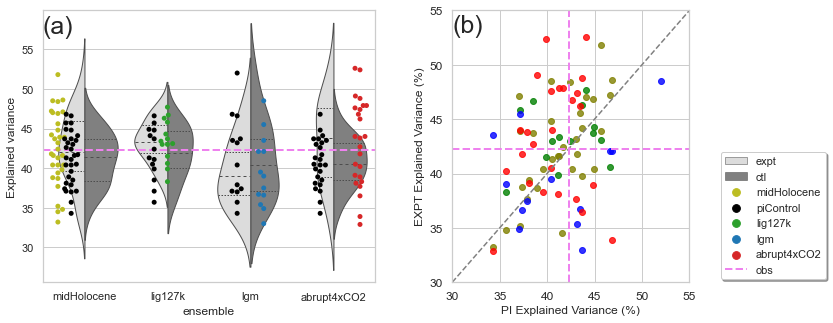

In [4]:

fig=plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1, 4, width_ratios=[7,0.3,5,1]) 
palette={"piControl": "black", 'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'}
ax=fig.add_subplot(gs[0])
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="Explained variance", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="Explained variance", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
plt.axhline(y=42.3,color='violet',ls='dashed',lw=2,label='obs')
ax.legend(loc='upper center', bbox_to_anchor=(2.2, 0.5),
          ncol=1, fancybox=True, shadow=True)


plt.text(-0.5,57,'(a)',fontsize=25)
plt.subplot(gs[2])
#plt.title('(b) Explained variance',loc='left',fontsize=15)

plt.scatter(piev,mhev,color='olive',alpha=0.8)
plt.scatter(piev,ligev,color='green',alpha=0.8)
plt.scatter(piev,lgmev,color='blue',alpha=0.8)
plt.scatter(piev,aco2ev,color='red',alpha=0.8)
plt.xlim([30,55])
plt.ylim([30,55])
plt.plot([30,55],[30,55],c='grey',ls='dashed',label='1:1')

plt.ylabel('EXPT Explained Variance (%)',fontsize=12)
plt.xlabel('PI Explained Variance (%)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(30,53,'(b)',fontsize=25)
plt.axhline(y=42.3,color='violet',ls='dashed',lw=2)
plt.axvline(x=42.3,color='violet',ls='dashed',lw=2)



In [ ]:
# Figure 5: NAO amplitude

In [5]:
all_ensembles= pd.read_csv("DATA/tidy_amplitude.csv")

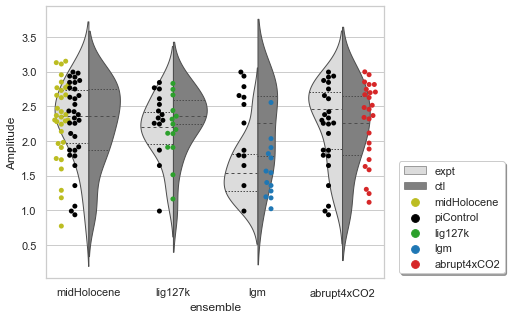

In [7]:
fig=plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[5,1]) 
palette={"piControl": "black", 'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'}
ax=fig.add_subplot(gs[0])
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="Amplitude", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="Amplitude", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
#plt.axhline(y=42.3,color='violet',ls='dashed',lw=2,label='obs')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.45),
          ncol=1, fancybox=True, shadow=True)




In [ ]:
# Figure 8: NAO effects on Europe

In [32]:
def add_panel(region,var):
    mh = pd.read_csv("DATA/ipcc_region/midHolocene-cal-adj_ipcc_%s_%s_avechange.csv"%(region,var))
    plt.scatter(mh.amp,mh.ave,color='palegoldenrod',label='MH - PI',alpha=0.8)
    lig = pd.read_csv("DATA/ipcc_region/lig127k-cal-adj_ipcc_%s_%s_avechange.csv"%(region,var))               
    plt.scatter(lig.amp,lig.ave,color='limegreen',label='LIG - PI',alpha=0.8)
    lgm = pd.read_csv("DATA/ipcc_region/lgm-cal-adj_ipcc_%s_%s_avechange.csv"%(region,var))
    plt.scatter(lgm.amp,lgm.ave,color='dodgerblue',label='LGM - PI',alpha=0.8)
    aco2 = pd.read_csv("DATA/ipcc_region/abrupt4xCO2_ipcc_%s_%s_avechange.csv"%(region,var))
    plt.scatter(aco2.amp,aco2.ave,color='red',label='4xCO2 - PI',alpha=0.8)
    plt.xlabel('NAO amplitude change (hPa)',fontsize=12)
    if var == "pr":
        yylabel = '%s pr change (mm d$^{-1}$)'%region
    if var == "tas":
        yylabel = '%s tas change (%sC)'%(region,chr(176))
    plt.legend()
    plt.ylabel(yylabel,fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=0,color='k',linestyle="--")
    plt.axhline(y=0,color='k',linestyle="--")


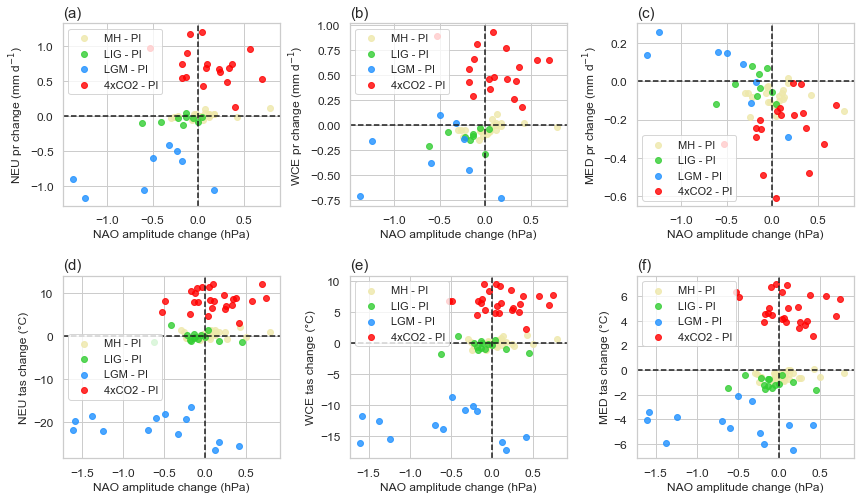

In [34]:
plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(3, 6, height_ratios=[10,1,10],width_ratios=[1,10,1,10,1,10])
plt.subplot(gs[1])
plt.title('(a)',loc='left',fontsize=15)
add_panel('NEU','pr')

plt.subplot(gs[3])
plt.title('(b)',loc='left',fontsize=15)
add_panel('WCE','pr')

plt.subplot(gs[5])
plt.title('(c)',loc='left',fontsize=15)
add_panel('MED','pr')

plt.subplot(gs[13])
plt.title('(d)',loc='left',fontsize=15)
add_panel('NEU','tas')

plt.subplot(gs[15])
plt.title('(e)',loc='left',fontsize=15)
add_panel('WCE','tas')

plt.subplot(gs[17])
plt.title('(f)',loc='left',fontsize=15)
add_panel('MED','tas')

plt.savefig('aprfig/europeanresponse.pdf')

In [ ]:
# Figure 9: ENSO-NAO relationship

In [21]:
f = pd.read_csv('DATA/DJF_nino34.csv',header=0)

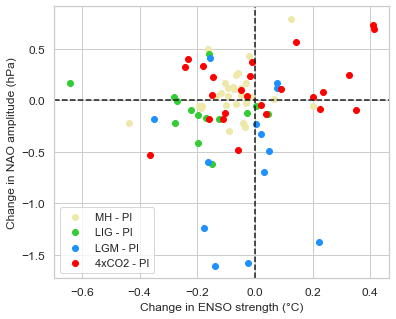

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(f.nmh,f.amh,color='palegoldenrod',label='MH - PI')
plt.scatter(f.nlig,f.alig,color='limegreen',label='LIG - PI')
plt.scatter(f.nlgm,f.algm,color='dodgerblue',label='LGM - PI')
#plt.scatter(drpco2['renam'],drpco2['renao'],color='limegreen',label='1pctCO2 - PI')
plt.scatter(f.n4xco2,f.a4xco2,color='red',label='4xCO2 - PI')
#plt.xlim([-0.2,0.5])
#plt.ylim([-0.75,0.75])
plt.axvline(x=0,color='k',ls='dashed')
plt.axhline(y=0,color='k',ls='dashed')
plt.legend(loc='lower left')
plt.ylabel('Change in NAO amplitude (hPa)',fontsize=12)
plt.xlabel('Change in ENSO strength (%sC)'%chr(176),fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('enso_amplitude_0407.pdf')